## Modelos de Regresión Lineal

### Modelo con datos simulados

* Y = a + b * x 
* X : 100 valor distribuidos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estara distribuido segun una N(0, 0.8)


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# np.random.seed(1997)

In [111]:
x = 1.5 + 2.5 * np.random.randn(100)

In [112]:
res = 0 + 0.8 * np.random.randn(100)

In [113]:
y_pred= 5 + 1.9 * x

In [114]:
y_act = 5 + 1.9 * x + res

In [115]:
x_list=x.tolist()
y_pred_list= y_pred.tolist()
y_act_list= y_act.tolist()

In [116]:
data = pd.DataFrame(
    {
        'x': x_list,
        'y_actual': y_act_list,
        'y_prediccion': y_pred_list,
    }
)

In [117]:
data.head()

,x,y_actual,y_prediccion
0,0.494482,5.596784,5.939516
1,4.740466,15.462751,14.006885
2,0.906196,7.788593,6.721772
3,-2.627083,0.029995,0.008542
4,1.195877,6.339120,7.272166


In [143]:
y_men = [np.mean(y_act) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

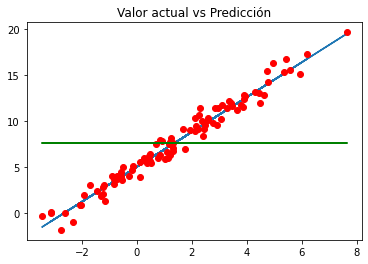

In [119]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, 'ro')
plt.plot(x,y_men, 'g')
plt.title("Valor actual vs Predicción")

SSD = Distancias del dato observado con respecto al modelo
SST = Distancia del dato observado con respecto al promedio
SSR = Distancia entre la predicción y el promedio

In [120]:
y_m = np.mean(y_act)
data["SSR"] = (data["y_prediccion"]-y_m)**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-y_m)**2

In [121]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.494482,5.596784,5.939516,2.947053,0.117465,4.241252
1,4.740466,15.462751,14.006885,40.331023,2.119547,60.942027
2,0.906196,7.788593,6.721772,0.873182,1.138107,0.017524
3,-2.627083,0.029995,0.008542,58.486882,0.000460,58.159217
4,1.195877,6.339120,7.272166,0.147493,0.870576,1.734738


In [122]:
SSR= sum(data['SSR'])
SSD= sum(data['SSD'])
SST= sum(data['SST'])

In [123]:
SSR

1984.6285842035443

In [124]:
SSD

63.066335243917

In [125]:
SST

2068.5605588211856

In [126]:
SSR+SSD

2047.6949194474612

In [127]:
R2= SSR / SST
R2

0.9594249371816932

(array([ 2.,  3.,  8.,  9., 23., 19., 16.,  7.,  7.,  6.]),
 array([-2.07621205, -1.70488938, -1.33356671, -0.96224404, -0.59092137,
        -0.2195987 ,  0.15172397,  0.52304664,  0.89436931,  1.26569197,
         1.63701464]),
 <BarContainer object of 10 artists>)

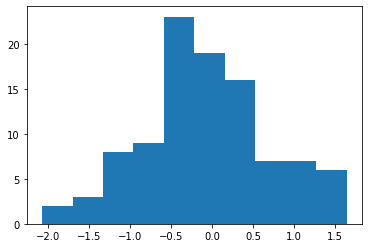

In [128]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi-x_m)*(yi-y_m))/sum((xi-x_m) ** 2)
* a = y_m - b * x_m

In [129]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean , y_mean

(1.3576811713984336, 7.656214027321547)

In [131]:
data['beta_n']= (data['x']-x_mean)*(data['y_actual']-y_mean)
data['beta_d']= (data['x']-x_mean)**2

In [132]:
beta = sum(data['beta_n'])/sum(data['beta_d'])

In [133]:
alpha = y_mean - beta * x_mean

In [134]:
alpha, beta

(5.06229206905088, 1.9105530907517014)

El modelo lineal obtenido por regresion es: y = 5.06229206905088 + 1.9105530907517014 * x

In [135]:
data['y_model']= alpha + beta * data['x']

In [136]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.494482,5.596784,5.939516,2.947053,0.117465,4.241252,1.777698,0.745113,6.007026
1,4.740466,15.462751,14.006885,40.331023,2.119547,60.942027,26.407835,11.443232,14.119204
2,0.906196,7.788593,6.721772,0.873182,1.138107,0.017524,-0.059767,0.203839,6.793627
3,-2.627083,0.029995,0.008542,58.486882,0.000460,58.159217,30.388684,15.878345,0.043111
4,1.195877,6.339120,7.272166,0.147493,0.870576,1.734738,0.213111,0.026181,7.347078


In [139]:

SSR= sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST= sum((data["y_actual"]-y_mean)**2)

In [140]:
SSR, SSD, SST

(2006.142490232761, 62.41806858842497, 2068.560558821185)

In [141]:
R2 = SSR / SST

In [142]:
R2

0.9698253607697159

Text(0.5, 1.0, 'Valor actual vs Predicción')

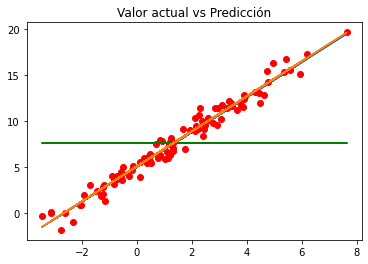

In [150]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'], 'ro')
plt.plot(data['x'],y_mean, 'g')
plt.plot(data['x'],data['y_model'] )
plt.title("Valor actual vs Predicción")